In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r'C:\Users\ASUS\Downloads\Parkinsonss.csv')

data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.shape

(195, 24)

In [4]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df1=data.pop('status')

data['status'] = df1

In [6]:
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values

In [7]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
model = XGBClassifier(eval_metric='logloss')

In [10]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [11]:
# Finally, generate y_pred (predicted values for x_test)

y_pred=model.predict(x_test)

In [12]:
print(accuracy_score(y_test,y_pred)*100)

94.87179487179486


[[ 5  2]
 [ 0 32]]


c:\new folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


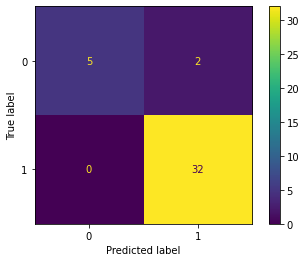

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [14]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



c:\new folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


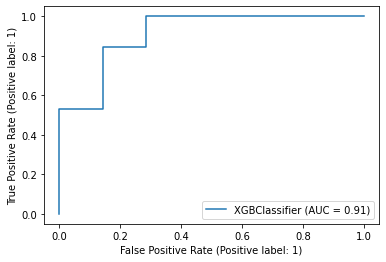

In [15]:
plot_roc_curve(model, x_test, y_test)

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

0.9705882352941176


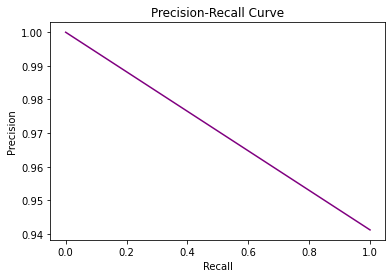

In [17]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)


#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [18]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [19]:
logloss = log_loss(y_test, model.predict(x_test))
logloss

1.771260307299533

In [20]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

x_train = pca.fit_transform(x_train)

x_test = pca.transform(x_test)

variance = pca.explained_variance_ratio_

classifi = KNeighborsClassifier(n_neighbors = 11,p=2,metric ='minkowski')

classifi.fit(x_train,y_train)

y_pred = classifi.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score

 #KNN model

cm=confusion_matrix(y_test,y_pred)

accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



c:\new folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


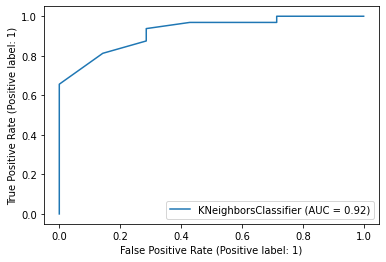

In [21]:
plot_roc_curve(classifi, x_test, y_test)

0.9530778657616892


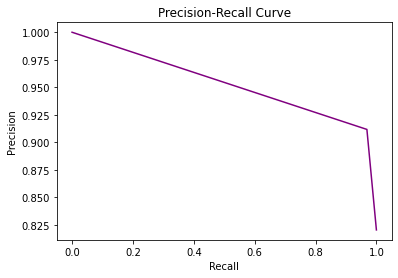

In [23]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()